In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
plt.rcParams.update({"font.size": 12})
%matplotlib inline

In C:\Users\96ank\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\96ank\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\96ank\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\96ank\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases lat

In [ ]:
!pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv("data/WSB_submissions_all.csv", sep=";")
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')
df.index = pd.DatetimeIndex(df.created_utc)
df.tail()

,Unnamed: 0,author,created_utc,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio
created_utc,,,,,,,,,,,
2018-12-31 15:05:18,861747,Leading_Breath,2018-12-31 15:05:18,ab7upy,NaN,417,1,454678,NaN,"""I don't give a shit about Tesla I just want t...",0.0
2018-12-31 14:45:20,861748,skitty2,2018-12-31 14:45:20,ab7oz6,NaN,8,1,454674,The whole next year will be green.,If today closes green,0.0
2018-12-31 14:40:30,861749,Googs84,2018-12-31 14:40:30,ab7nkw,Shitpost,0,1,454672,Happy New Year to all you degenerates includin...,Happy New Year Degenerates,0.0
2018-12-31 14:34:10,861750,neocoff,2018-12-31 14:34:10,ab7lu7,NaN,7,1,454672,NaN,Chip stocks set for worst quarter in a decade....,0.0
2018-12-31 14:29:50,861751,Brodmann,2018-12-31 14:29:50,ab7km1,Discussion,2,1,454671,NaN,Aphria down 7% premarket; Questions Surface if...,0.0


In [3]:
df=df.drop("created_utc",axis=1)

In [4]:
df=df.rename(columns={"Unnamed: 0": "SegmentID"})

In [5]:
df.head()

,SegmentID,author,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio
created_utc,,,,,,,,,,
2021-10-19 17:58:57,0,VendiVendiVendi,qbh10s,Gain,0,1,10967090,So 13.56 cad for BB. It’s moving and gaining ...,BB,1.0
2021-10-19 17:57:49,1,Far_Bass_7284,qbh04w,News,1,1,10967087,NaN,Surely it is a coincidence.,1.0
2021-10-19 17:55:24,2,HistoricalAnimator43,qbgyco,YOLO,0,1,10967076,NaN,yolo sava options,1.0
2021-10-19 17:54:51,3,ZaRaWi,qbgxy8,YOLO,0,1,10967076,NaN,meme,1.0
2021-10-19 17:52:33,4,CuteInterest1884,qbgw9u,DD,0,1,10967075,"BB is on the move higher, not because of the p...",BB,1.0


In [ ]:
#Sentences are encoded by calling model.encode() #https://www.sbert.net/
#import re
#df_title = df["title"].apply(lambda title: re.sub(r"http\S+", "", title).lower(), 1)
#df_title[5000]
#embeddings = model.encode(df_title.tolist())

In [6]:
import pickle
#Store sentences & embeddings on disc
#with open('/content/drive/MyDrive/WSB/embeddings.pkl', "wb") as fOut:
#    pickle.dump({'sentences': df_title.tolist(), 'embeddings': embeddings}, fOut, protocol=pickle.HIGHEST_PROTOCOL)

#Load sentences & embeddings from disc
with open('data/embeddings.pkl', "rb") as fIn:
    stored_data = pickle.load(fIn)
    stored_sentences = stored_data['sentences']
    stored_embeddings = stored_data['embeddings']

In [9]:
len(stored_embeddings)

861752

In [12]:
type(stored_embeddings)

numpy.ndarray

In [ ]:
stored_embeddings[:2]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 861752 entries, 2021-10-19 17:58:57 to 2018-12-31 14:29:50
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   SegmentID              861752 non-null  int64  
 1   author                 861752 non-null  object 
 2   id                     861752 non-null  object 
 3   link_flair_text        814626 non-null  object 
 4   num_comments           861752 non-null  int64  
 5   score                  861752 non-null  int64  
 6   subreddit_subscribers  861752 non-null  int64  
 7   selftext               223819 non-null  object 
 8   title                  861752 non-null  object 
 9   upvote_ratio           861752 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 72.3+ MB


In [15]:
df['embedding'] = stored_embeddings.tolist()

In [16]:
df.head()

,SegmentID,author,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio,embedding
created_utc,,,,,,,,,,,
2021-10-19 17:58:57,0,VendiVendiVendi,qbh10s,Gain,0,1,10967090,So 13.56 cad for BB. It’s moving and gaining ...,BB,1.0,"[0.08041322976350784, 0.5628291964530945, -0.7..."
2021-10-19 17:57:49,1,Far_Bass_7284,qbh04w,News,1,1,10967087,NaN,Surely it is a coincidence.,1.0,"[-0.44094061851501465, -0.08837655186653137, 0..."
2021-10-19 17:55:24,2,HistoricalAnimator43,qbgyco,YOLO,0,1,10967076,NaN,yolo sava options,1.0,"[-0.40423384308815, 0.3974497616291046, -0.313..."
2021-10-19 17:54:51,3,ZaRaWi,qbgxy8,YOLO,0,1,10967076,NaN,meme,1.0,"[-0.3721004128456116, 0.35575810074806213, 0.3..."
2021-10-19 17:52:33,4,CuteInterest1884,qbgw9u,DD,0,1,10967075,"BB is on the move higher, not because of the p...",BB,1.0,"[0.08041322976350784, 0.5628291964530945, -0.7..."


In [17]:
df.to_csv('data/WSB_data_with_emb.csv',sep=';')

In [ ]:
"""
This is a more complex example on performing clustering on large scale dataset.
This examples find in a large set of sentences local communities, i.e., groups of sentences that are highly
similar. You can freely configure the threshold what is considered as similar. A high threshold will
only find extremely similar sentences, a lower threshold will find more sentence that are less similar.
A second parameter is 'min_community_size': Only communities with at least a certain number of sentences will be returned.
The method for finding the communities is extremely fast, for clustering 50k sentences it requires only 5 seconds (plus embedding comuptation).

"""
from sentence_transformers import SentenceTransformer, util
import os
import csv
import time

titles = stored_sentences[0:40000]

print("Start clustering")
start_time = time.time()

#Two parameters to tune:
#min_cluster_size: Only consider cluster that have at least 100 elements
#threshold: Consider sentence pairs with a cosine-similarity larger than threshold as similar
clusters = util.community_detection(stored_embeddings[0:40000], min_community_size=100, threshold=0.70)

print("Clustering done after {:.2f} sec".format(time.time() - start_time))

#Print for all clusters the top 3 and bottom 3 elements
for i, cluster in enumerate(clusters):
    print("\nCluster {}, #{} Elements ".format(i+1, len(cluster)))
    for sentence_id in cluster[0:3]:
        print("\t", titles[sentence_id])
    print("\t", "...")
    for sentence_id in cluster[-3:]:
        print("\t", titles[sentence_id])


Start clustering
Clustering done after 33.10 sec

Cluster 1, #230 Elements 
	 to the moon
	 to the moon
	 to the moon
	 ...
	 tui me to tha moon
	 come on elon help us going to the moon
	 sdc to the moon!!!!

Cluster 2, #215 Elements 
	 adtx💎🚀🚀🚀🚀
	 💫
	 😎
	 ...
	 buy the dip🚀🚀🚀
	 wish to hell😭😭
	 stand by ✋😂

Cluster 3, #162 Elements 
	 $clov yolo
	 $clov yolo
	 $clov yolo
	 ...
	 $clov is ready again 🚀
	 copied $clov
	 $lcid $clov $idex $jagx lets goooooooo! 💰

Cluster 4, #136 Elements 
	 wsb
	 wsb now
	 new to wsb
	 ...
	 has stocktwits become the new wsb
	 he obviously found wsb.
	 can anybody guess where i found wsb?🤡

Cluster 5, #133 Elements 
	 wish$
	 $wish
	 $wish
	 ...
	 here you go you sick fucks $wish
	 started my position on $wish
	 let's try this $wish business yolo

Cluster 6, #119 Elements 
	 am i doing this right?
	 am i doing this right?
	 am i doing this right?
	 ...
	 is this how i’m supposed to do it?
	 is this right ?
	 did i do something wrong?

Cluster 7, #111 Ele

In [7]:
stored_sentences[50]

"$ysg yatsen holding (nyse: ysg), future l'oreal of china"

In [56]:
author_list =df[df['SegmentID'] < 50]['author'][:][0:500].tolist()

In [8]:
stored_embeddings[50]

tensor([[-0.5545,  0.8472, -0.1737,  ..., -0.8908,  0.1790,  1.0774],
        [ 0.2182,  0.9250,  0.4209,  ..., -0.5684, -0.2199,  1.3938],
        [ 0.1964,  1.3039,  1.4290,  ..., -0.4559,  0.1984,  1.7098],
        ...,
        [-0.5663,  0.9565, -0.4537,  ..., -0.4376,  0.5234,  0.5840],
        [ 0.0597,  1.0089,  0.3023,  ..., -0.5755, -0.4315,  1.0553],
        [-0.2906,  1.3107,  0.6428,  ..., -1.2197, -0.4024,  1.1298]])

In [12]:
stored_embeddings[50].size()

torch.Size([24, 768])

In [ ]:
from sklearn.cluster import AgglomerativeClustering
# Normalize the embeddings to unit length
corpus_embeddings = stored_embeddings[0:5000] /  np.linalg.norm(stored_embeddings[0:5000], axis=1, keepdims=True)
titles = stored_sentences[0:5000]
# Perform kmean clustering
clustering_model = AgglomerativeClustering(n_clusters=None,affinity='cosine',linkage='average',  distance_threshold=0.90) #,affinity='cosine', linkage='average', distance_threshold=1
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []

    clustered_sentences[cluster_id].append(titles[sentence_id])
print(len(clustered_sentences.items()))
for i, cluster in clustered_sentences.items():
    print("Cluster ", i+1)
    print(len(cluster))
    print(cluster)
    print("")

In [9]:
## TSINE Embedding Visualization 

from sklearn.manifold import TSNE
%matplotlib inline

In [20]:
stored_embeddings[50][:][:][:].numpy()

array([[-0.55452025,  0.8472104 , -0.17372064, ..., -0.89082617,
         0.17901888,  1.0773505 ],
       [ 0.21823782,  0.92498493,  0.42089903, ..., -0.5684333 ,
        -0.21987383,  1.3937865 ],
       [ 0.19636495,  1.3038974 ,  1.4289933 , ..., -0.45588315,
         0.19839036,  1.7098453 ],
       ...,
       [-0.5662651 ,  0.95652807, -0.4537239 , ..., -0.4376186 ,
         0.5234431 ,  0.58399975],
       [ 0.05972336,  1.0088934 ,  0.3023097 , ..., -0.5754747 ,
        -0.43150175,  1.0552564 ],
       [-0.2906491 ,  1.3107067 ,  0.64278907, ..., -1.2197479 ,
        -0.40239522,  1.1297985 ]], dtype=float32)

In [29]:
#Convert Tensors to numpy array #stored_embeddings[50][:][:10][0].numpy()
emb_array = []
for emb in stored_embeddings:
    emb_array.append(np.mean(emb[:][:][:].numpy(),axis=0))

In [28]:
np.mean(stored_embeddings[50][:][:][:].numpy(),axis=0).shape

(768,)

In [32]:
np.mean(stored_embeddings[51][:][:][:].numpy(),axis=0).shape

(768,)

In [22]:
emb_array[51].shape

(14, 768)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


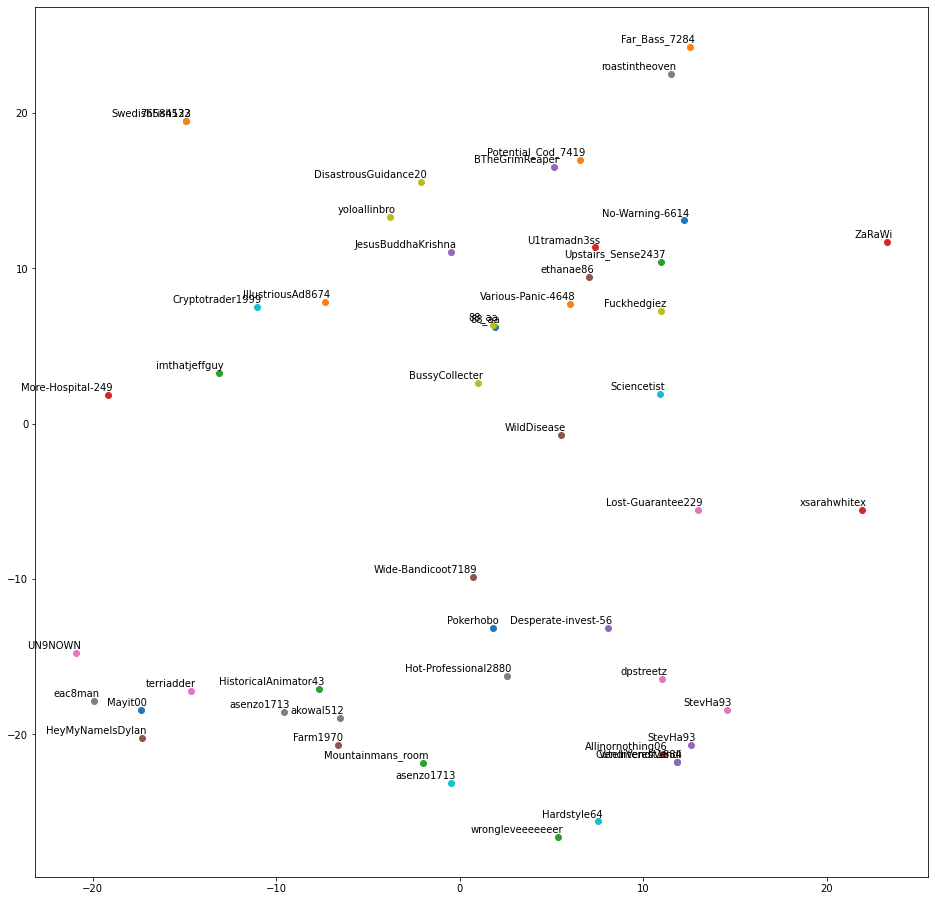

In [61]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(emb_array)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])
        
plt.figure(figsize=(16, 16)) 
for i in range(len(x[0:50])):
    plt.scatter(x[i],y[i])
    plt.annotate(author_list[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
plt.show()